# Sensitivity Analysis and Grid Convergence

We will use the CFD example from assignment 2 to look at the influence of the grid size and CFL number (or dt) on the error done in the solution. A module has been created with the different routines that we need:
* grid(): create grid vector, dx, ind, etc
* BC_constant(): update a vector with a constant boundary condition in ghost cells
* BC_periodic(): update a vector with a periodic boundary condition using ghost cells
* dt_march_11(): step a specified number of time steps forward using 1st order space (backwards difference), 1st order time explicit scheme
* dt_march_12(): step a specified number of time steps forward using 2nd order space (centered difference), 1st order time explicit scheme
* dt_march_22(): step a specified number of time steps forward using a 2nd order space and time explicit scheme. This scheme is called the Lax-Wendroff scheme.

Note that this is not the best "python-y" way of doing things. We are using python without exploiting the power of objects. This is a conscious choice to make the code more readable for a beginning python user. You can look at the python code by opening the file FirstCFD.py.

The application we built before to solve the one-way wave equation

$\frac{\partial P}{\partial t} + c \frac{\partial P}{\partial x} = 0$

now looks like the following:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import FirstCFD as FC

Absolute Error :  0.038704798914769856


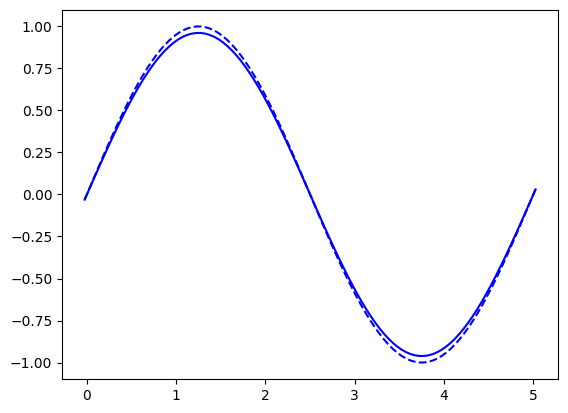

In [44]:
xL = 0
xR = 5
npts = 100
nghost = 1
c = 1
L = xR-xL
BC_update = FC.BC_periodic   #this is how we choose the boundary condition
##BC_update = FC.BC_constant  #this would select the constant boundary condition

dx,xi, ind = FC.grid(xL,xR,npts,nghost)  #Generate the discretization a.k.a. the grid
P0 = np.sin(2*np.pi*xi/(xR-xL))                #Calculate the initial condition
P0 = BC_update(P0,nghost,0)
t  = 0
CFL = 0.8
dt = CFL*dx/c

nsteps = L/(c*dt)

Pend = FC.dt_march_11(P0,t,xi,dt,dx,c,npts,nghost,nsteps,BC_update);

AbsErr = max(abs(Pend - P0))
print('Absolute Error : ',AbsErr)
plt.plot(xi,P0,'--b',xi,Pend,'-b')

The above code was wrapped in a neat function (think of it like a mini-mini version of fluent, only for a single problem), CFDapp(integrator_function, CFL, number of points). That function returns dx, dt, the absolute error, and the initial and final solutions. It doesn't plot the solution, however, you can do that yourself. You can use it in the following way:

dx =  0.05
dt =  0.005000000000000001
AbsErr =  0.020358104856158743


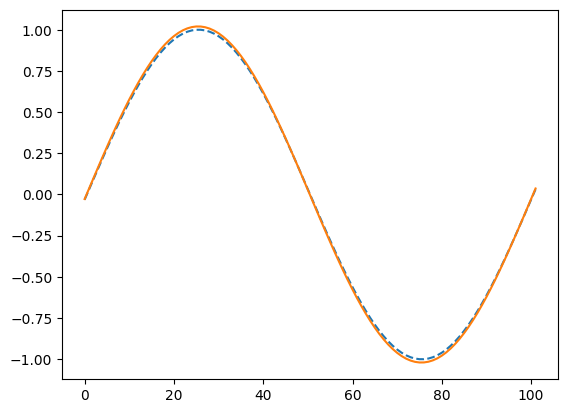

In [45]:
dx, dt, xi, P0, Pend, AbsErr = FC.CFDApp(FC.dt_march_12,0.1,100)
print('dx = ', dx)
print('dt = ', dt)
print('AbsErr = ', AbsErr)
plt.plot(P0,'--',Pend,'-')


You can move between solvers easily by changing the name of the function (either FC.dt_march_11, FC.dt_march_12 or FC.dt_march 22).

The question now is "**How much error are we making and how do we pick the parameters dt and dx?**"

# Exercises

## Exercise 1: Grid convergence Study for the dt_march_11


Run the 1st order (backwards difference) space and 1st order time solver (a.k.a. the function dt_march_11) repeatedly with different number of points. I suggest 10,50,100,500,600. Don't go too far above 600 or I think we might kill the server. You can use a constant value of CFL = 0.1. Record the absolute error and plot error vs Npts.

In [46]:
nptVec = np.array([10,])
ErrVec = np.array([])
dxVec  = np.array([])
dtVec  = np.array([])
for npts in nptVec:
    dx,dt,xi, P0, Pend, AbsErr = FC.CFDApp(FC.dt_march_11, 0.1, npts);
    ErrVec = np.append(ErrVec, AbsErr)
    dxVec  = np.append(dxVec,  dx)
    dtVec  = np.append(dtVec,  dt)
print(nptVec)
print(dxVec)
print(dtVec)
print(ErrVec)

[10]
[0.5]
[0.05]
[0.83373561]


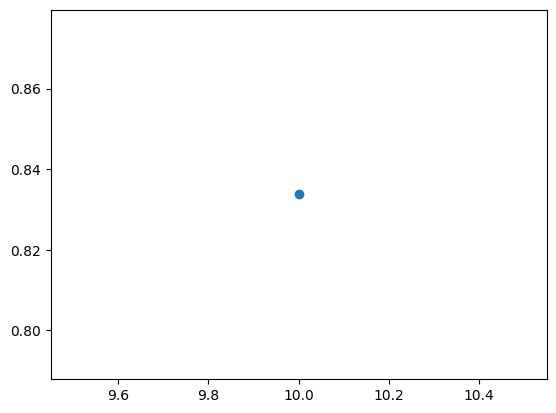

In [47]:
plt.plot(nptVec,ErrVec,'o-')

The error is related to the grid spacing usually along the lines of 

$E \sim (dx)^n$

or, since $dx \sim 1/N_\mathrm{pts}$,

$E \sim (N_\mathrm{pts})^{-n}$.

The number $n$ is called the order of convergence. You can see it, visually, if you plot in the log-log space. Indeed, taking the log of both sides, you have

$log(E) \sim -n log(N_\mathrm{pts})$.

In a log-log plot, the slope of the straight portion of the graph is thus the order of convergence. Use the function loglog() to plot the error against the number of points.

[1.]
[-0.07897165]


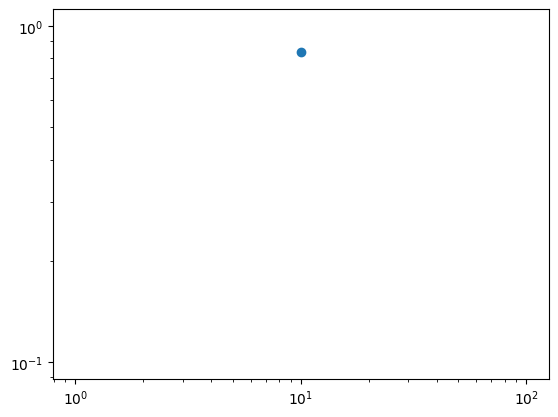

In [48]:
logN   = np.log10(nptVec)
logErr = np.log10(ErrVec)
print(logN)
print(logErr)
plt.loglog(nptVec,ErrVec,'o-')

You can use the numpy function polyfit to find the slope of the best fit straight line. The function, as it is shown next, finds the best fit straight line (i.e. polynomial of degree deg=1). The returned array contains 2 constants, 1st the slope and 2nd the intercept.

In [50]:
np.polyfit(logN, logErr,deg=1)

/opt/conda/envs/scikit/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([-0.03948582, -0.03948582])

Write your answer here:

**The order of convergence for the 1st order in time, 1st order in space (backwards) algorithm is .....**

## Exercise 2: Repeat for dt_march_12 and dt_march_22

Repeat the process for the other 2 algorithms provided and the same CFL number? Plot all 3 curves (1 for each algorithm) on the same log-log plot). Depending on your choice of CFL and Npts, some solutions (especially for dt_march_12) might blow up. only take the error points from the straight, diminishing portion of the error curve to calculate the order of the error.

In [51]:
... insert code here...

SyntaxError: invalid syntax (252379608.py, line 1)

In [52]:
... insert code here ...

SyntaxError: invalid syntax (2012712227.py, line 1)

Write your answer here:

**The order of convergence for each method is:**
* n_11 = ...
* n_12 = ...
* n_22 = ...


## Exercise 3: Redo for CFL = 0.8 and describe results

If you run the problems for CFL = 0.8 instead of CFL = 0.1. Describe what happens.

**Write your description here:**

With CFL=0.8, the ......... . This is in contrast to ............ .

In [53]:
... insert code here...

SyntaxError: invalid syntax (252379608.py, line 1)

In [54]:
... insert code here...

SyntaxError: invalid syntax (252379608.py, line 1)

## (Bonus) Exercise 4: What about CFL?

If you keep the number of points constant but vary CFL instead, you will see a different behaviour. Using 1 of the 3 methods, keep npts = 200 and vary CFL (but never exceed 1). Try to describe what you see.

**Put your description here:**

Wow! What happens is .................

In [55]:
... insert code here...

SyntaxError: invalid syntax (252379608.py, line 1)